<p class="pull-left">
ANLT 212 - Analytics Computing <br> Prof. Dana Nehoran
</p>
<div class="pull-right">
<ul class="list-inline">
R Project: <br> Video Games
</ul>
</div>

---
# Analysis of the Video Games Sales Dataset
 <br> By Dat Mai & Mingfei Ma

## Catalog

>**1. Objective**<br>
>**2. Data Exploration**<br>
>**3. Data Cleaning**<br>
>**4. Adaptation**<br>
>**5. Descriptive Visualization**<br>
>**6. Response Variable**<br>
>**7. Explore Correlations**<br>
>**8. Linear Regression**
>**9. Multiple Linear Regression**<br>
>**10. Project Report**

## 1. Objective


Sony Computer Entertainment (SCE) or Sony Interactive Entertainment (SIE) is a multinational video game and digital entertainment company wholly owned by Japanese conglomerate Sony Corporation.

Since the launch of the original PlayStation console in 1994, the company has been developing PlayStation home video game consoles, accessories and services lineup. The company expanded from Japan into North America and Europe, where it founded the branches Sony Computer Entertainment.

In 2020, Sony hired us to do an analysis of the video games to know:

1. If they should work on the sequence of their existing games or create a new game. 

2. And if they have to create a new game, select the right genre, platform, and ESRB rating to ensure its success on the market. 

## 2. Data Exploration

In [61]:
# Load the dataset
vgs <- read.csv("Video_Games_Sales_as_at_22_Dec_2016.csv", stringsAsFactors = FALSE)

In [62]:
# Load the libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

### 1)Show the first 10 rows

In [63]:
# Show the first 10 rows
head(vgs, 10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,NA,NA,,
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,NA,NA,,
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,NA,NA,,
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
8,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E


### Content

Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:

- Criticscore - Aggregate score compiled by Metacritic staff Criticcount - The number of critics used in coming up with the Criticscore Userscore - Score by Metacritic's subscribers
- Usercount - Number of users who gave the userscore
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings

### 2) Check the stucture of the dataset

In [64]:
str(vgs)

'data.frame':	16719 obs. of  16 variables:
 $ Name           : chr  "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Platform       : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Year_of_Release: chr  "2006" "1985" "2008" "2009" ...
 $ Genre          : chr  "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher      : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales       : num  41.4 29.1 15.7 15.6 11.3 ...
 $ EU_Sales       : num  28.96 3.58 12.76 10.93 8.89 ...
 $ JP_Sales       : num  3.77 6.81 3.79 3.28 10.22 ...
 $ Other_Sales    : num  8.45 0.77 3.29 2.95 1 0.58 2.88 2.84 2.24 0.47 ...
 $ Global_Sales   : num  82.5 40.2 35.5 32.8 31.4 ...
 $ Critic_Score   : int  76 NA 82 80 NA NA 89 58 87 NA ...
 $ Critic_Count   : int  51 NA 73 73 NA NA 65 41 80 NA ...
 $ User_Score     : num  8 NA 8.3 8 NA NA 8.5 6.6 8.4 NA ...
 $ User_Count     : int  322 NA 709 192 NA NA 431 129 594 NA ...
 $ Developer      : chr  "Nintendo" "" "Nintendo" "Nintendo" ...
 $ 

We have **16719 rows** and **16 columns** in this dataset

### 3) Sumarry the dataset

In [65]:
summary(vgs)

     Name             Platform         Year_of_Release       Genre          
 Length:16719       Length:16719       Length:16719       Length:16719      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Publisher            NA_Sales          EU_Sales         JP_Sales      
 Length:16719       Min.   : 0.0000   Min.   : 0.000   Min.   : 0.0000  
 Class :character   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.0000  
 Mode  :character   Median : 0.0800   Median : 0.020   Median : 0.0000  
                    Mean   : 0.2633   Mean   : 0.145   Mean   : 0.0776  
                   

In [66]:
# Total number of video games have been released since 1980
cat("There are", length(unique(vgs$Name)) , "games have been released since 1980","\n")
# Total number of platforms
cat("There are", length(unique(vgs$Platform)) , "platforms since 1980","\n")
# Total number of video game developers
cat("There are", length(unique(vgs$Developer)) , "video game developers since 1980","\n")
# Total number of video game punlishers
cat("There are", length(unique(vgs$Publisher)) , "video game publishers since 1980","\n")
# Avergae number of video games sales around the world 
cat('Average number of video games sales around the world since 1980:', mean(vgs$Global_Sales), 'million copies',"\n")
# Avergae critic scores for video games
cat('Average critic scores for video games:', mean(vgs$Critic_Score, na.rm = TRUE), "/100","\n")
# Avergae user scores for video games
cat('Average user scores for video games:', mean(vgs$User_Score, na.rm = TRUE), '/10',"\n")

There are 11563 games have been released since 1980 
There are 31 platforms since 1980 
There are 1697 video game developers since 1980 
There are 583 video game publishers since 1980 
Average number of video games sales around the world since 1980: 0.5335427 million copies 
Average critic scores for video games: 68.96768 /100 
Average user scores for video games: 7.125046 /10 


### 4）Draw a plot to see if User_Score can replace Critic_Score

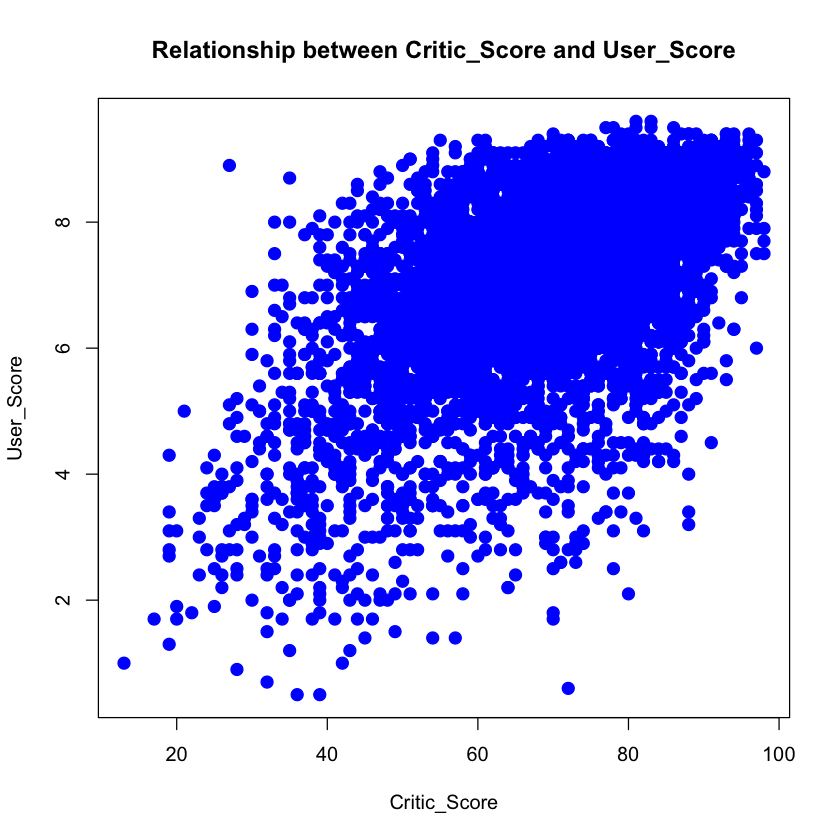

In [67]:
# Create a subset consisted of Critic_Score and User_Score
two_scores <- subset(vgs, select =c(Critic_Score,User_Score))
two_scores <- na.omit(two_scores)
p <- plot(two_scores, col='blue', pch=20, cex=2, 
     main="Relationship between Critic_Score and User_Score", 
     xlab="Critic_Score", ylab="User_Score")

As we can see from the figure above, they are not totally same and cannot be confirmed that they have connections between two kinds of score.

## 3. Data Cleaning

In [68]:
# New video games sales after data cleaning
new_vgs <- vgs %>% select(Name, Platform, Genre, Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales, Critic_Score,Critic_Count, User_Score,User_Count ,Rating, Year_of_Release)
new_vgs <- na.omit(new_vgs)
new_vgs <- subset(new_vgs,Year_of_Release>=2000,select=c(Name, Platform, Genre, Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales, Critic_Score,Critic_Count, User_Score,User_Count ,Rating, Year_of_Release))
# Sony's video games sales without NA rows
sony_vgs <- new_vgs %>% filter(str_detect(Publisher, "Sony"))
sony_vgs <- na.omit(sony_vgs)
# Sony's video games sales in 21st century, and sort it by year
sony_nvgs <- subset(sony_vgs,Year_of_Release>=2000,select=c(Name, Platform, Genre, Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales, Critic_Score,Critic_Count, User_Score,User_Count ,Rating, Year_of_Release))
sony_nvgs <- sony_nvgs[order(sony_nvgs$Year_of_Release,decreasing=T),]
head(sony_nvgs,10)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
10,Uncharted 4: A Thief's End,PS4,Shooter,Sony Computer Entertainment,1.85,2.50,0.19,0.85,5.38,93,113,7.9,7064,T,2016
172,Until Dawn: Rush of Blood,PS4,Adventure,Sony Computer Entertainment,0.18,0.15,0.00,0.07,0.39,72,49,8.0,68,M,2016
220,PlayStation VR Worlds,PS4,Misc,Sony Computer Entertainment,0.06,0.14,0.02,0.04,0.25,59,48,7.1,73,M,2016
287,RIGS: Mechanized Combat League,PS4,Action,Sony Computer Entertainment,0.03,0.05,0.01,0.02,0.11,79,42,7.9,76,T,2016
297,DriveClub VR,PS4,Racing,Sony Computer Entertainment,0.03,0.05,0.00,0.01,0.09,67,34,7.4,110,E,2016
316,Here They Lie,PS4,Adventure,Sony Computer Entertainment,0.00,0.02,0.00,0.00,0.02,62,31,6.5,36,M,2016
319,Super Stardust Ultra VR,PS4,Shooter,Sony Computer Entertainment,0.00,0.01,0.00,0.00,0.01,66,13,6.2,13,E10+,2016
13,Uncharted: The Nathan Drake Collection,PS4,Action,Sony Computer Entertainment,2.07,1.71,0.08,0.76,4.62,86,78,8.1,1264,T,2015
42,Bloodborne,PS4,Action,Sony Computer Entertainment,1.03,0.81,0.26,0.38,2.48,92,100,8.6,6383,M,2015


## 4. Adaptation

- We create 2 columns
- First column-average of score = (critic score/10 + user score)/2
- Second column-western_sales and eastern_sales

In [69]:
new_vgs$Total_Score <- (new_vgs$Critic_Score/10 + new_vgs$User_Score)/2
head(new_vgs)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Year_of_Release,Total_Score
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,E,2006,7.80
3,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,E,2008,8.25
4,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,E,2009,8.00
7,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,E,2006,8.70
8,Wii Play,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,E,2006,6.20
9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,E,2009,8.55


In [70]:
new_vgs$Western_Sales <- (new_vgs$NA_Sales + new_vgs$EU_Sales)
new_vgs$Eastern_Sales <- (new_vgs$JP_Sales + new_vgs$Other_Sales)
new_fvgs <- new_vgs %>% select(Name, Genre, Publisher,Western_Sales,Eastern_Sales,Global_Sales, Total_Score, Rating, Year_of_Release)
head(new_fvgs,10)

,Name,Genre,Publisher,Western_Sales,Eastern_Sales,Global_Sales,Total_Score,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Wii Sports,Sports,Nintendo,70.32,12.22,82.53,7.80,E,2006
3,Mario Kart Wii,Racing,Nintendo,28.44,7.08,35.52,8.25,E,2008
4,Wii Sports Resort,Sports,Nintendo,26.54,6.23,32.77,8.00,E,2009
7,New Super Mario Bros.,Platform,Nintendo,20.42,9.38,29.80,8.70,E,2006
8,Wii Play,Misc,Nintendo,23.14,5.77,28.92,6.20,E,2006
9,New Super Mario Bros. Wii,Platform,Nintendo,21.38,6.94,28.32,8.55,E,2009
12,Mario Kart DS,Racing,Nintendo,17.18,6.03,23.21,8.85,E,2005
14,Wii Fit,Sports,Nintendo,16.95,5.75,22.70,7.85,E,2007
15,Kinect Adventures!,Misc,Microsoft Game Studios,19.89,1.93,21.81,6.20,E,2010


In [71]:
# Create new Sony video game sales
sony_nvgs <- new_vgs %>% filter(str_detect(Publisher, "Sony"))
sony_nvgs <- subset(sony_vgs,Year_of_Release>=2000,select=c(Name, Genre, Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales, Critic_Score,Critic_Count, User_Score,User_Count ,Rating, Year_of_Release))
# Sorted by years
sony_nvgs <- sony_nvgs[order(sony_nvgs$Year_of_Release,decreasing=T),]
head(sony_nvgs,10)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
10,Uncharted 4: A Thief's End,Shooter,Sony Computer Entertainment,1.85,2.50,0.19,0.85,5.38,93,113,7.9,7064,T,2016
172,Until Dawn: Rush of Blood,Adventure,Sony Computer Entertainment,0.18,0.15,0.00,0.07,0.39,72,49,8.0,68,M,2016
220,PlayStation VR Worlds,Misc,Sony Computer Entertainment,0.06,0.14,0.02,0.04,0.25,59,48,7.1,73,M,2016
287,RIGS: Mechanized Combat League,Action,Sony Computer Entertainment,0.03,0.05,0.01,0.02,0.11,79,42,7.9,76,T,2016
297,DriveClub VR,Racing,Sony Computer Entertainment,0.03,0.05,0.00,0.01,0.09,67,34,7.4,110,E,2016
316,Here They Lie,Adventure,Sony Computer Entertainment,0.00,0.02,0.00,0.00,0.02,62,31,6.5,36,M,2016
319,Super Stardust Ultra VR,Shooter,Sony Computer Entertainment,0.00,0.01,0.00,0.00,0.01,66,13,6.2,13,E10+,2016
13,Uncharted: The Nathan Drake Collection,Action,Sony Computer Entertainment,2.07,1.71,0.08,0.76,4.62,86,78,8.1,1264,T,2015
42,Bloodborne,Action,Sony Computer Entertainment,1.03,0.81,0.26,0.38,2.48,92,100,8.6,6383,M,2015


In [72]:
sony_nvgs$Western_Sales <- (sony_nvgs$NA_Sales + sony_nvgs$EU_Sales)
sony_nvgs$Eastern_Sales <- (sony_nvgs$JP_Sales + sony_nvgs$Other_Sales)
sony_nvgs$Total_Score <- (sony_nvgs$Critic_Score/10 + sony_nvgs$User_Score)/2

nsony_nvgs <- sony_nvgs %>% select(Name, Genre, Publisher, Western_Sales, Eastern_Sales, Global_Sales, Total_Score, Rating, Year_of_Release)
head(nsony_nvgs,10)

,Name,Genre,Publisher,Western_Sales,Eastern_Sales,Global_Sales,Total_Score,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
10,Uncharted 4: A Thief's End,Shooter,Sony Computer Entertainment,4.35,1.04,5.38,8.60,T,2016
172,Until Dawn: Rush of Blood,Adventure,Sony Computer Entertainment,0.33,0.07,0.39,7.60,M,2016
220,PlayStation VR Worlds,Misc,Sony Computer Entertainment,0.20,0.06,0.25,6.50,M,2016
287,RIGS: Mechanized Combat League,Action,Sony Computer Entertainment,0.08,0.03,0.11,7.90,T,2016
297,DriveClub VR,Racing,Sony Computer Entertainment,0.08,0.01,0.09,7.05,E,2016
316,Here They Lie,Adventure,Sony Computer Entertainment,0.02,0.00,0.02,6.35,M,2016
319,Super Stardust Ultra VR,Shooter,Sony Computer Entertainment,0.01,0.00,0.01,6.40,E10+,2016
13,Uncharted: The Nathan Drake Collection,Action,Sony Computer Entertainment,3.78,0.84,4.62,8.35,T,2015
42,Bloodborne,Action,Sony Computer Entertainment,1.84,0.64,2.48,8.90,M,2015


## 5. Descriptive Visualization

1) Plotting gplot matrix，and check the correlations between each sales

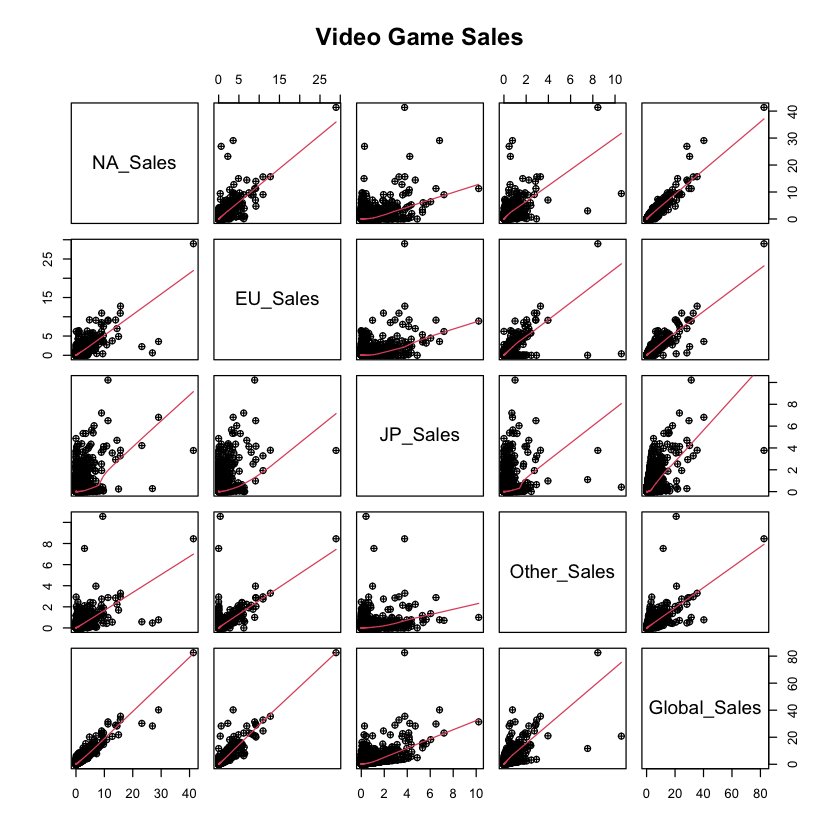

In [73]:
pairs(vgs[6:10], main = "Video Game Sales", pch = 10,
      panel = panel.smooth)

2) Plotting the Genre Trend of Sony games

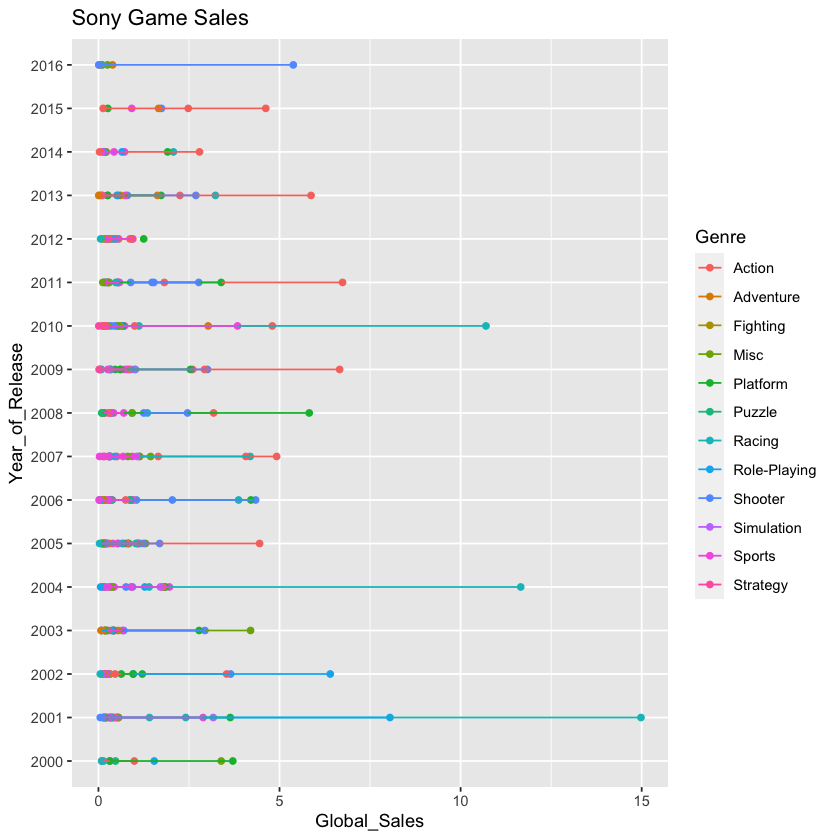

In [74]:
#Genre Trend of Sony games
qplot(Global_Sales, Year_of_Release, data = nsony_nvgs, main = "Sony Game Sales", geom = c("point", "line"), color = Genre)

3) Plotting the scatter using different shape to represent Rating, then we can take a quick look of western sales and eastern sales

Warning message:
“Removed 6 rows containing missing values (geom_point).”


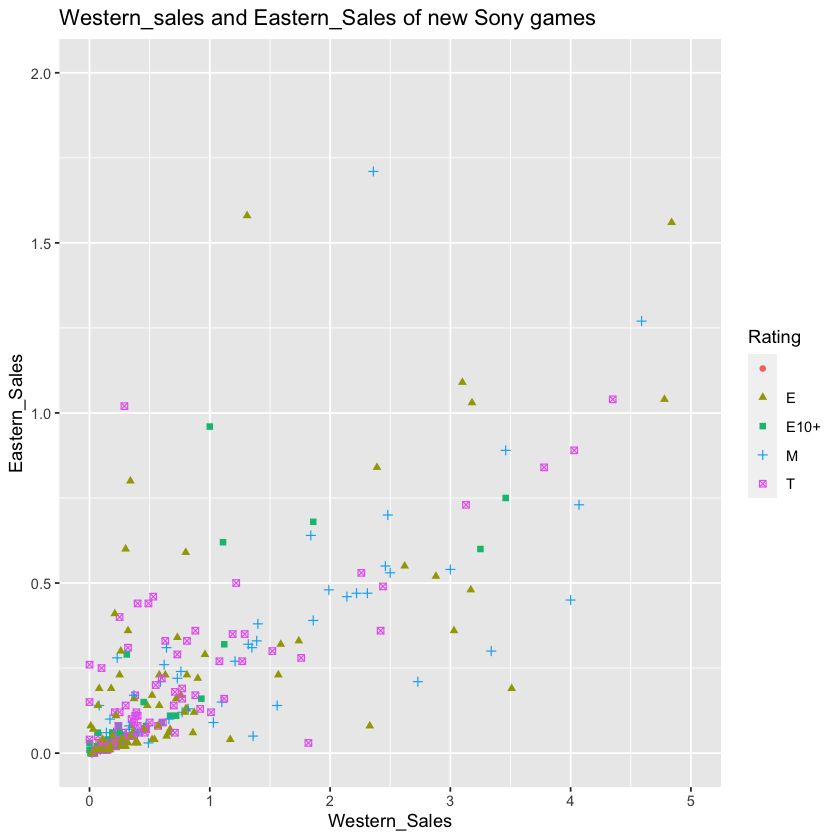

In [75]:
scatter <- ggplot(data= nsony_nvgs, aes(x = Western_Sales, y = Eastern_Sales))
scatter + geom_point(aes(color=Rating, shape=Rating)) + 
   xlab("Western_Sales") +  ylab("Eastern_Sales") + 
   ggtitle("Western_sales and Eastern_Sales of new Sony games") + xlim(0,5) + ylim(0,2)

4) Plotting a piechart to show the western and eastern sales in global sales

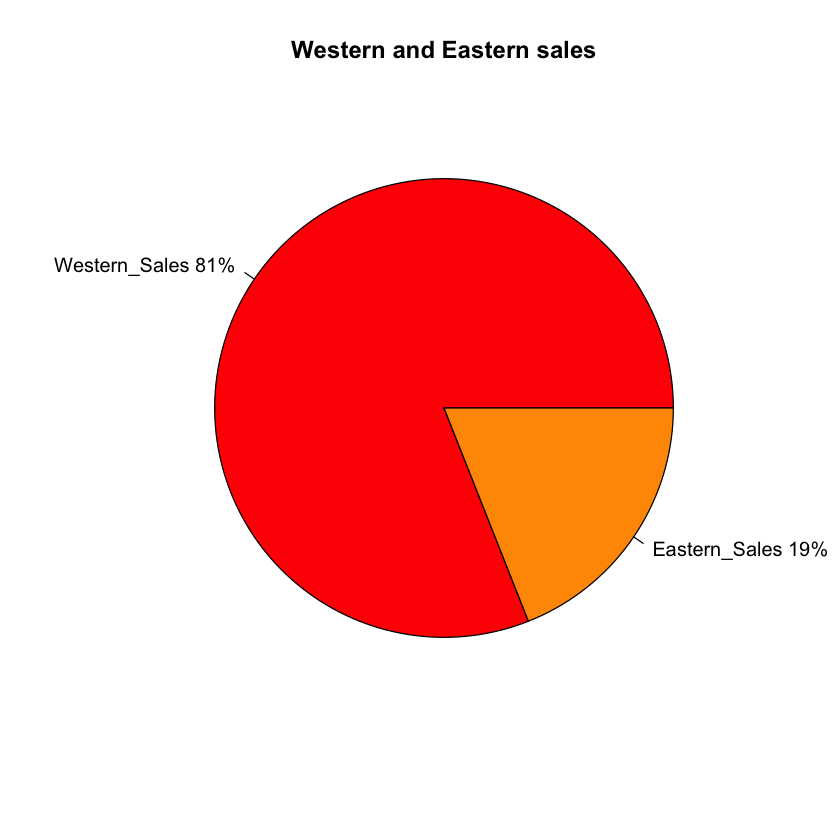

In [76]:
percentage_of_sales <- c(round(sum(new_fvgs$Western_Sales)/sum(new_fvgs$Global_Sales),2),round(sum(new_fvgs$Eastern_Sales)/sum(new_fvgs$Global_Sales),2))
labels <- c("Western_Sales", "Eastern_Sales")
pie(percentage_of_sales,labels = paste(labels,paste(percentage_of_sales*100, "%", sep='')),main="Western and Eastern sales",col = rainbow(10))

### 1) Find the trend

In [77]:
sony2n <- subset(nsony_nvgs,Total_Score >= 8)

In [78]:
sony3n <- subset(sony2n, Global_Sales >= 5)

In [79]:
# Potential games from Sony with Global Sales >= 1 and Total_Scores >= 8
head(sony3n,10)

,Name,Genre,Publisher,Western_Sales,Eastern_Sales,Global_Sales,Total_Score,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
10,Uncharted 4: A Thief's End,Shooter,Sony Computer Entertainment,4.35,1.04,5.38,8.60,T,2016
8,The Last of Us,Action,Sony Computer Entertainment Europe,4.59,1.27,5.87,9.30,M,2013
5,Uncharted 3: Drake's Deception,Action,Sony Computer Entertainment,5.52,1.22,6.74,8.75,T,2011
6,Uncharted 2: Among Thieves,Action,Sony Computer Entertainment,5.47,1.19,6.66,9.20,T,2009
9,LittleBigPlanet,Platform,Sony Computer Entertainment,4.78,1.04,5.82,8.15,E,2008
2,Gran Turismo 4,Racing,Sony Computer Entertainment,3.02,8.63,11.66,8.70,E,2004
7,Kingdom Hearts,Role-Playing,Sony Computer Entertainment,4.84,1.56,6.40,8.65,E,2002
1,Gran Turismo 3: A-Spec,Racing,Sony Computer Entertainment,11.94,3.03,14.98,8.95,E,2001
4,Final Fantasy X,Role-Playing,Sony Computer Entertainment,4.98,3.06,8.05,8.95,T,2001


In [80]:
new_fvgs2 <- subset(new_fvgs,Total_Score >= 8)
new_fvgs3 <- subset(new_fvgs2, Global_Sales >= 5)

In [81]:
# Best games in the history (with Total Score >= 8 and Global Sales > 5 millions)
head(new_fvgs3,10)

,Name,Genre,Publisher,Western_Sales,Eastern_Sales,Global_Sales,Total_Score,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,Mario Kart Wii,Racing,Nintendo,28.44,7.08,35.52,8.25,E,2008
4,Wii Sports Resort,Sports,Nintendo,26.54,6.23,32.77,8.00,E,2009
7,New Super Mario Bros.,Platform,Nintendo,20.42,9.38,29.80,8.70,E,2006
9,New Super Mario Bros. Wii,Platform,Nintendo,21.38,6.94,28.32,8.55,E,2009
12,Mario Kart DS,Racing,Nintendo,17.18,6.03,23.21,8.85,E,2005
17,Grand Theft Auto V,Action,Take-Two Interactive,16.11,4.94,21.04,8.95,M,2013
18,Grand Theft Auto: San Andreas,Action,Take-Two Interactive,9.83,10.98,20.81,9.25,M,2004
24,Grand Theft Auto V,Action,Take-Two Interactive,14.80,1.47,16.27,8.90,M,2013
25,Grand Theft Auto: Vice City,Action,Take-Two Interactive,13.90,2.25,16.15,9.10,M,2002


In [82]:
genre_fvgs <- table(new_fvgs3$Genre)
rating_fvgs <- table(new_fvgs3$Rating)
genre_fvgs <- data.frame(genre_fvgs)
rating_fvgs <- data.frame(rating_fvgs)

We plot these two above to take a look

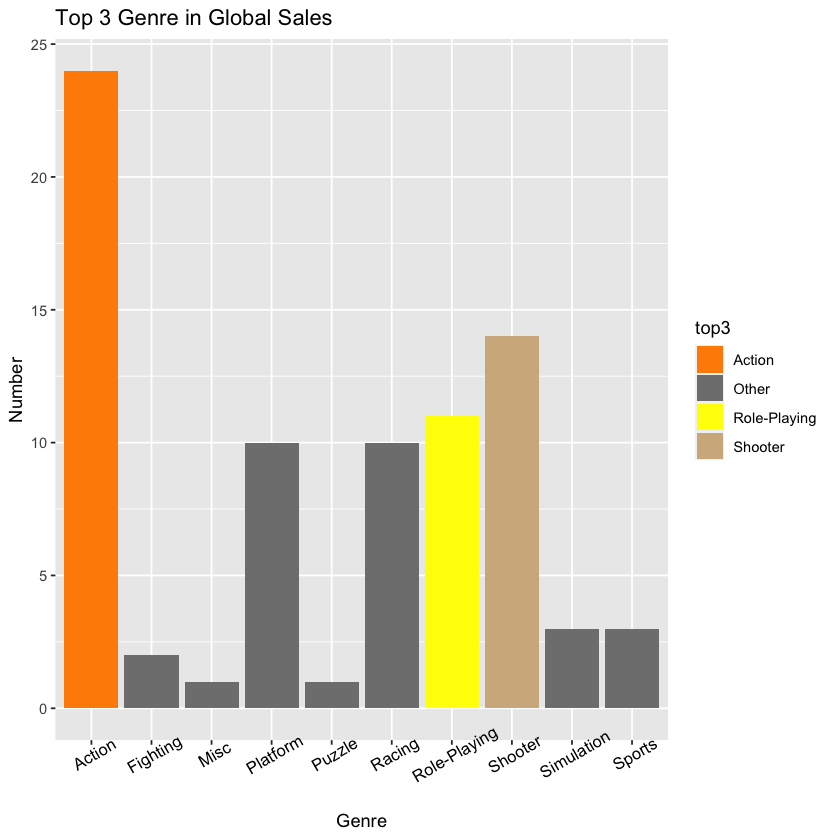

In [83]:
genre_fvgs$top3 <- "Other"
genre_fvgs$top3[genre_fvgs$Var1 == "Action"] <- "Action"
genre_fvgs$top3[genre_fvgs$Var1 == "Shooter"] <- "Shooter"
genre_fvgs$top3[genre_fvgs$Var1 == "Role-Playing"] <- "Role-Playing"
ggplot(genre_fvgs,aes(x=Var1,y= Freq,fill=top3))+ 
geom_bar(stat="identity")+xlab("Genre") + ylab("Number")+ 
theme(axis.text.x=element_text(colour="black",angle=30,size=10))+ ggtitle("Top 3 Genre in Global Sales") +
scale_fill_manual(values = c("Action"="darkorange","Shooter"="tan","Role-Playing"="yellow","Other"="grey50"))

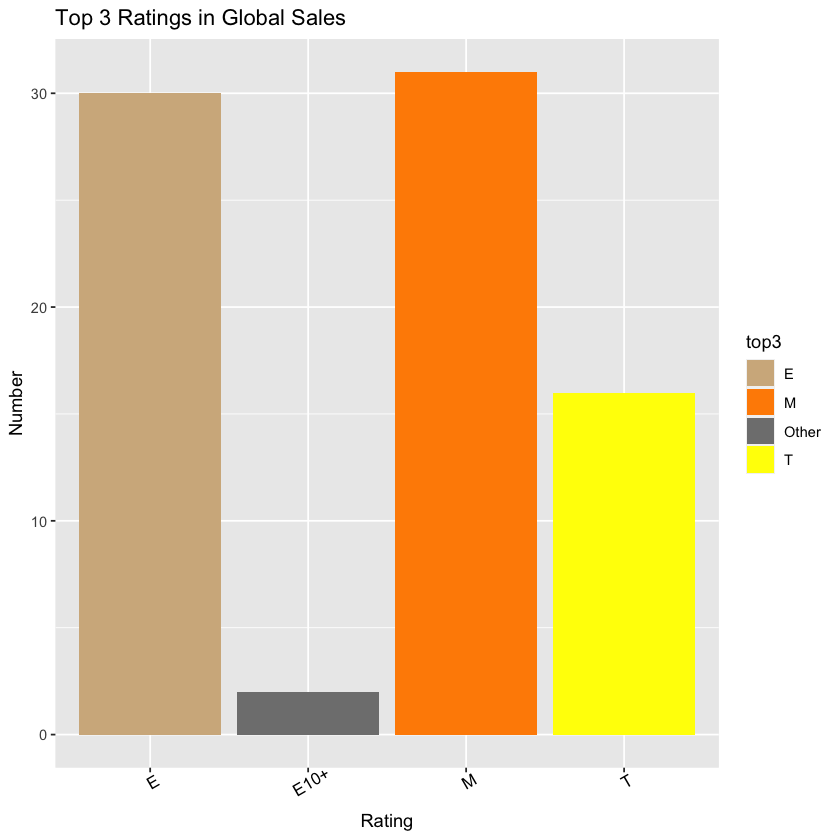

In [84]:
rating_fvgs$top3 <- "Other"
rating_fvgs$top3[rating_fvgs$Var1 == "M"] <- "M"
rating_fvgs$top3[rating_fvgs$Var1 == "E"] <- "E"
rating_fvgs$top3[rating_fvgs$Var1 == "T"] <- "T"
ggplot(rating_fvgs,aes(x=Var1,y= Freq,fill=top3))+ 
geom_bar(stat="identity")+xlab("Rating") + ylab("Number")+ 
theme(axis.text.x=element_text(colour="black",angle=30,size=10))+ggtitle("Top 3 Ratings in Global Sales")+
scale_fill_manual(values = c("M"="darkorange","E"="tan","T"="yellow","Other"="grey50"))

#### So we got the trend of video games is that the genre is Action, and the Rating is M

### 2) Set a subset from Sony games that the genre is Action

In [85]:
Act_sony_games <- subset(sony3n,sony3n$Genre == "Action")
Act_sony_games

,Name,Genre,Publisher,Western_Sales,Eastern_Sales,Global_Sales,Total_Score,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8,The Last of Us,Action,Sony Computer Entertainment Europe,4.59,1.27,5.87,9.30,M,2013
5,Uncharted 3: Drake's Deception,Action,Sony Computer Entertainment,5.52,1.22,6.74,8.75,T,2011
6,Uncharted 2: Among Thieves,Action,Sony Computer Entertainment,5.47,1.19,6.66,9.20,T,2009


As we can see, the best choice is that Sony should release The Last of Us on PS4 next, the reasons are:<br>
1.The Genre is Action, which matches our result below.<br>
2.The Rating is M, which matches our result below.<br>
3.The PS4 is made by Sony, they have more experience with PS4.<br>

### 3) Let's get the 2 datesets involving high western sales and high eastern sales to see if our results previous is correct.

In [113]:
high_fwestern_games <- subset(new_fvgs, new_fvgs$Western_Sales > mean(new_fvgs$Western_Sales),select = c(Name,Genre,Publisher,Western_Sales,Eastern_Sales,Rating))
high_feastern_games <- subset(new_fvgs, new_fvgs$Eastern_Sales > mean(new_fvgs$Eastern_Sales),select = c(Name,Genre,Publisher,Western_Sales,Eastern_Sales,Rating))

In [114]:
hwg_genre <- data.frame(table(high_fwestern_games$Genre))
hwg_rating <- data.frame(table(high_fwestern_games$Rating))
heg_genre <- data.frame(table(high_feastern_games$Genre))
heg_rating <- data.frame(table(high_feastern_games$Rating))

Let's plot them to take a quick look

In [115]:
hwg_genre$top3 <- "Other"
hwg_genre$top3[hwg_genre$Var1 == "Action"] <- "Action"
hwg_genre$top3[hwg_genre$Var1 == "Sports"] <- "Sports"
hwg_genre$top3[hwg_genre$Var1 == "Shooter"] <- "Shooter"

heg_genre$top3 <- "Other"
heg_genre$top3[heg_genre$Var1 == "Action"] <- "Action"
heg_genre$top3[heg_genre$Var1 == "Role-Playing"] <- "Role-Playing"
heg_genre$top3[heg_genre$Var1 == "Shooter"] <- "Shooter"

hwg_rating$top3 <- "Other"
hwg_rating$top3[hwg_rating$Var1 == "E"] <- "E"
hwg_rating$top3[hwg_rating$Var1 == "T"] <- "T"
hwg_rating$top3[hwg_rating$Var1 == "M"] <- "M"

heg_rating$top3 <- "Other"
heg_rating$top3[heg_rating$Var1 == "T"] <- "T"
heg_rating$top3[heg_rating$Var1 == "E"] <- "E"
heg_rating$top3[heg_rating$Var1 == "M"] <- "M"


1) Genre in western sales

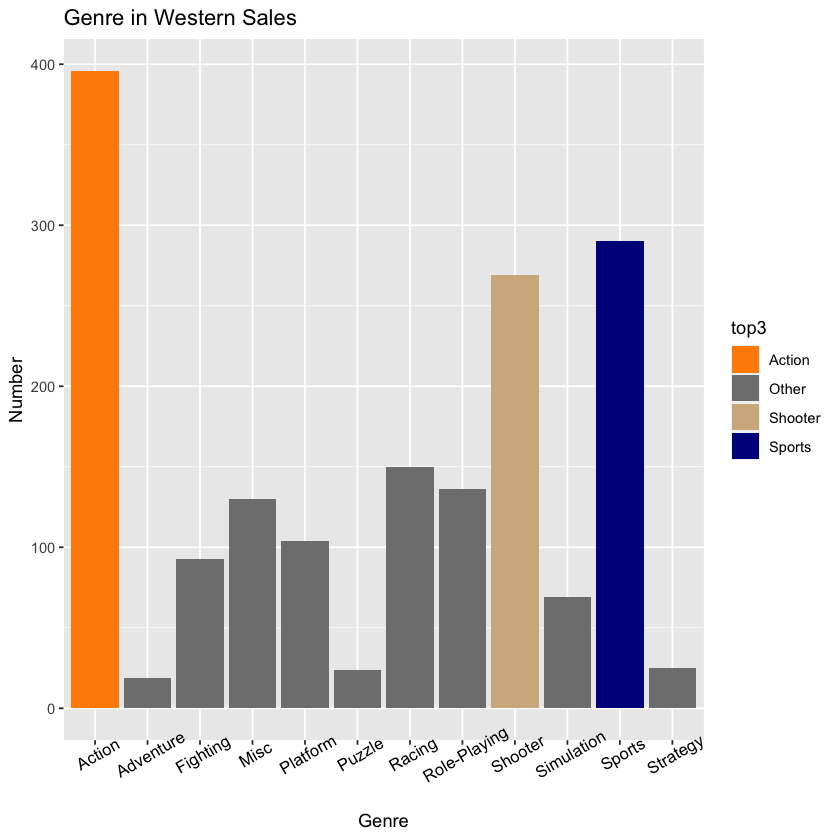

In [116]:
ggplot(hwg_genre,aes(x=Var1,y= Freq,fill=top3))+ 
geom_bar(stat="identity")+xlab("Genre") + ylab("Number")+ ggtitle("Genre in Western Sales") +
theme(axis.text.x=element_text(colour="black",angle=30,size=10))+ 
scale_fill_manual(values = c("Action"="darkorange","Sports"="darkblue","Shooter"="tan","Other"="grey50"))

2) Genre in eastern sales

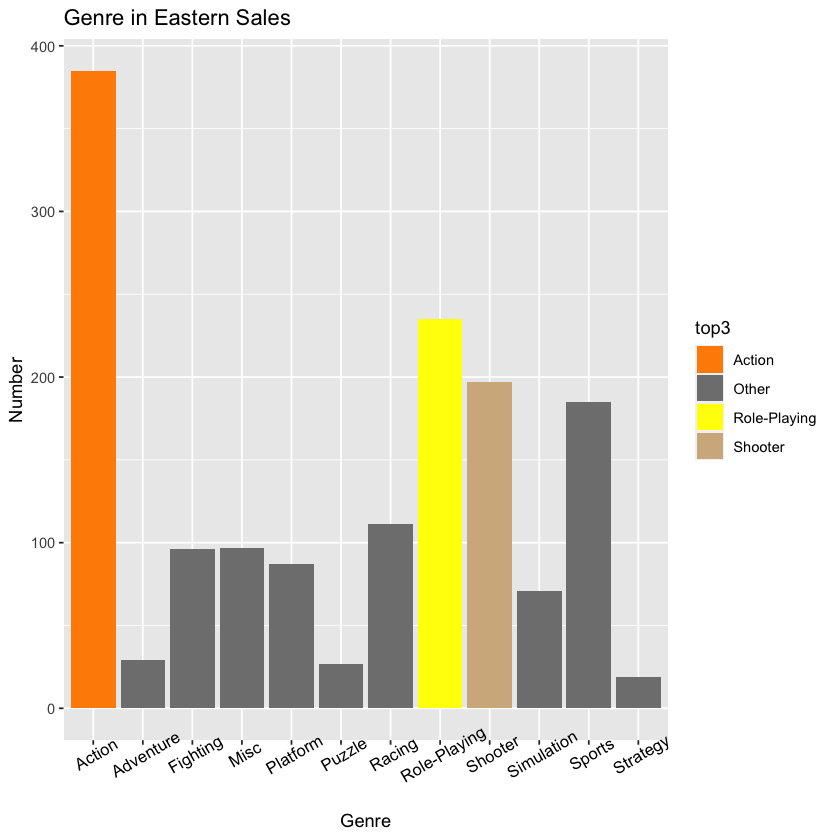

In [117]:
ggplot(heg_genre,aes(x=Var1,y= Freq,fill=top3))+ 
geom_bar(stat="identity")+xlab("Genre") + ylab("Number")+ 
theme(axis.text.x=element_text(colour="black",angle=30,size=10))+ ggtitle("Genre in Eastern Sales") +
scale_fill_manual(values = c("Action"="darkorange","Role-Playing"="yellow","Shooter"="tan","Other"="grey50"))

3) Top 3 Rating in Western Sales

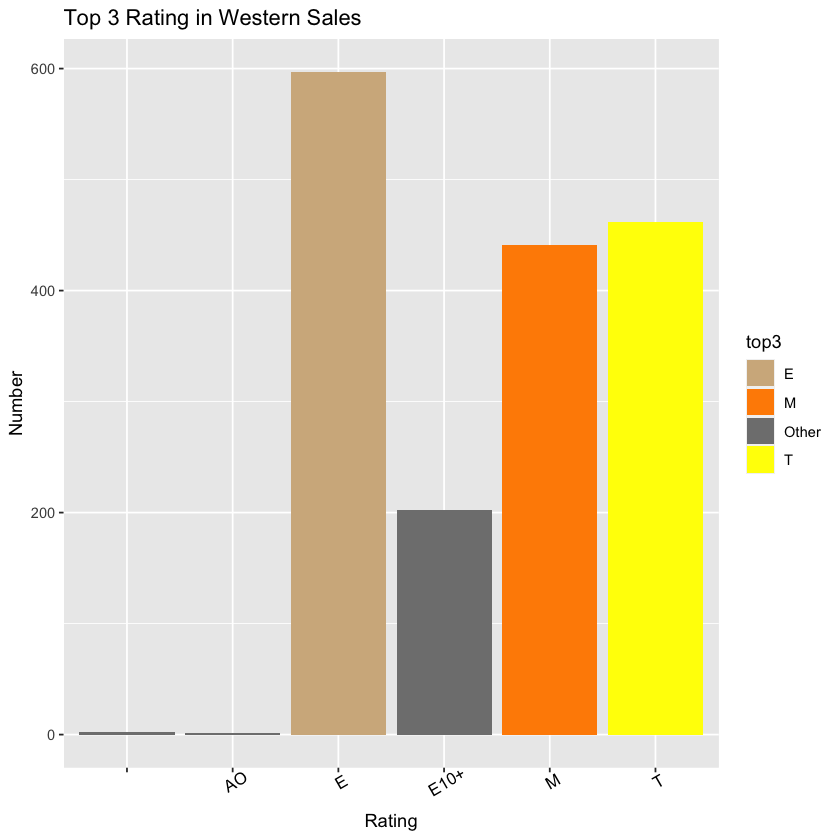

In [118]:
ggplot(hwg_rating,aes(x=Var1,y= Freq,fill=top3))+ 
geom_bar(stat="identity")+xlab("Rating") + ylab("Number")+ 
theme(axis.text.x=element_text(colour="black",angle=30,size=10))+ ggtitle("Top 3 Rating in Western Sales") +
scale_fill_manual(values = c("E"="tan","T"="yellow","M"="darkorange","Other"="grey50"))

4) Top 3 Rating in Eastern Sales

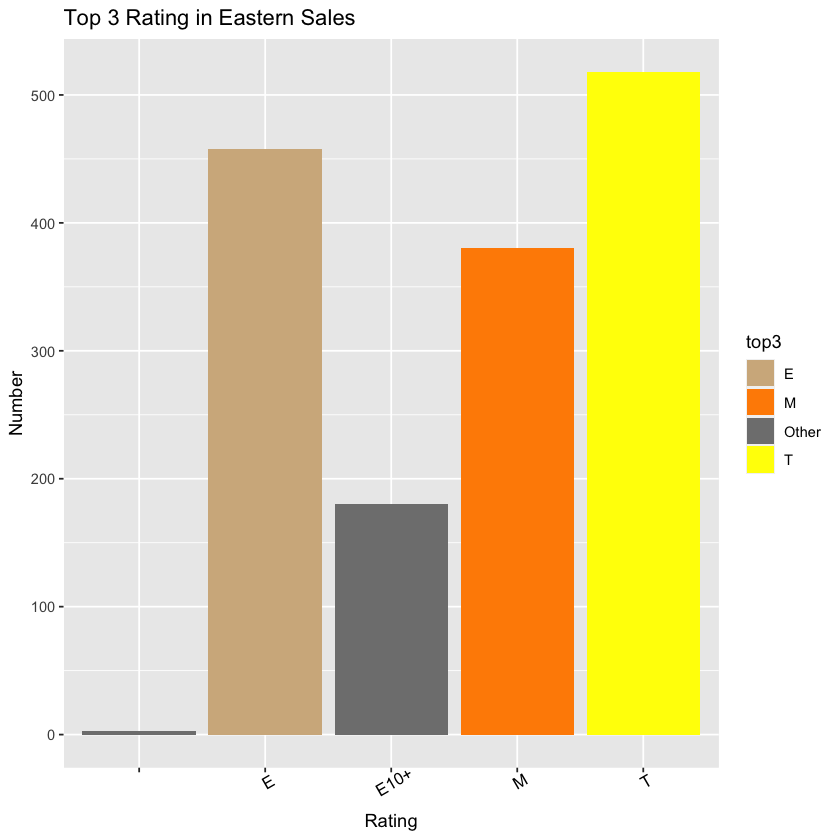

In [119]:
ggplot(heg_rating,aes(x=Var1,y= Freq,fill=top3))+ 
geom_bar(stat="identity")+xlab("Rating") + ylab("Number")+ 
theme(axis.text.x=element_text(colour="black",angle=30,size=10))+ ggtitle("Top 3 Rating in Eastern Sales") +
scale_fill_manual(values = c("T"="yellow","E"="tan","M"="darkorange","Other"="grey50"))

#### So, we get the results that:
#### 1. For high western sales, the action games are pretty popular and the common Rating is E
#### 2. For high eastern sales, the action games are pretty popular as well, but the common Rating is T

## 6. Response Variable

As the results we got before<br>
1. The trend is Action - M<br>
2. The most suitable for Sony games is The Last of Us on PS4 in Rating of M<br>
3. For high western sales, the action games are pretty popular and the common Rating is E<br>
4. For high eastern sales, the action games are pretty popular as well, but the common Rating is T<br>

Our mission is to predict the sales of The Last of Us on PS4 in Rating of M. And to prove that NA_Sales and EU_Salse have a huge contribution to Global_Sales, we use x1 as predictor 1 and x2 as predictor 2. See if more variable will be more helpful with our prediction, and get our prediction of sales of the Sony game

## 7. Explore Correlations

1) Figure of correlation between NA sales and EU sales

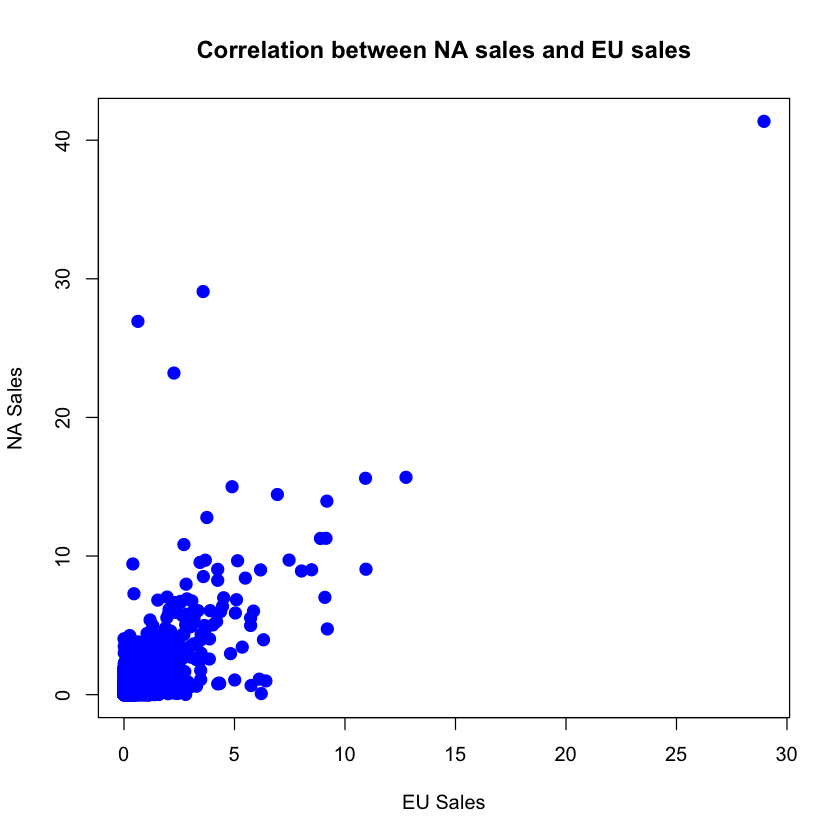

In [93]:
plot(x = vgs$EU_Sales, y = vgs$NA_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between NA sales and EU sales", 
     xlab="EU Sales", ylab="NA Sales")

2) Figure of correlation between NA sales and JP sales

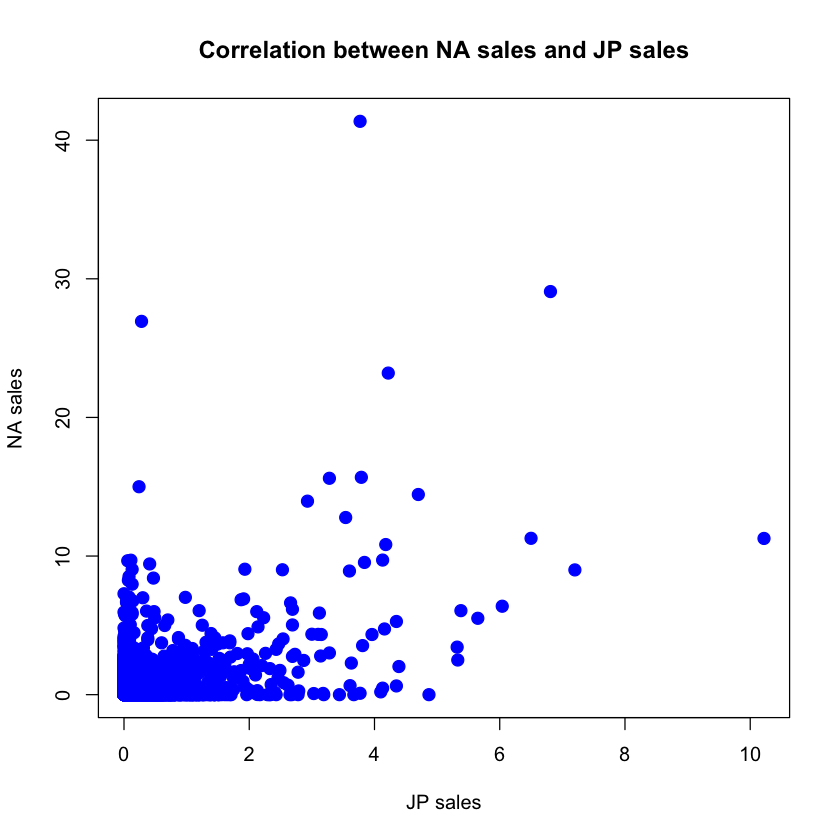

In [94]:
plot(x = vgs$JP_Sales, y = vgs$NA_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between NA sales and JP sales", 
     xlab="JP sales", ylab="NA sales")

3) Figure of correlation between global sales and NA sales

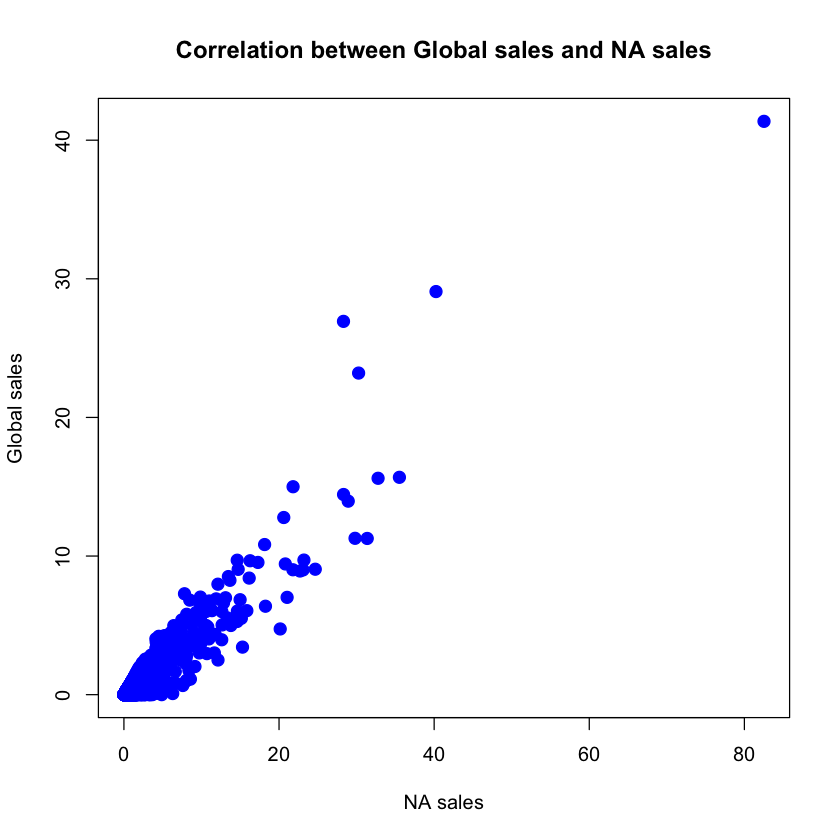

In [95]:
plot(x = vgs$Global_Sales, y = vgs$NA_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between Global sales and NA sales", 
     xlab="NA sales", ylab="Global sales")

4) Figure of correlation between global sales and EU sales

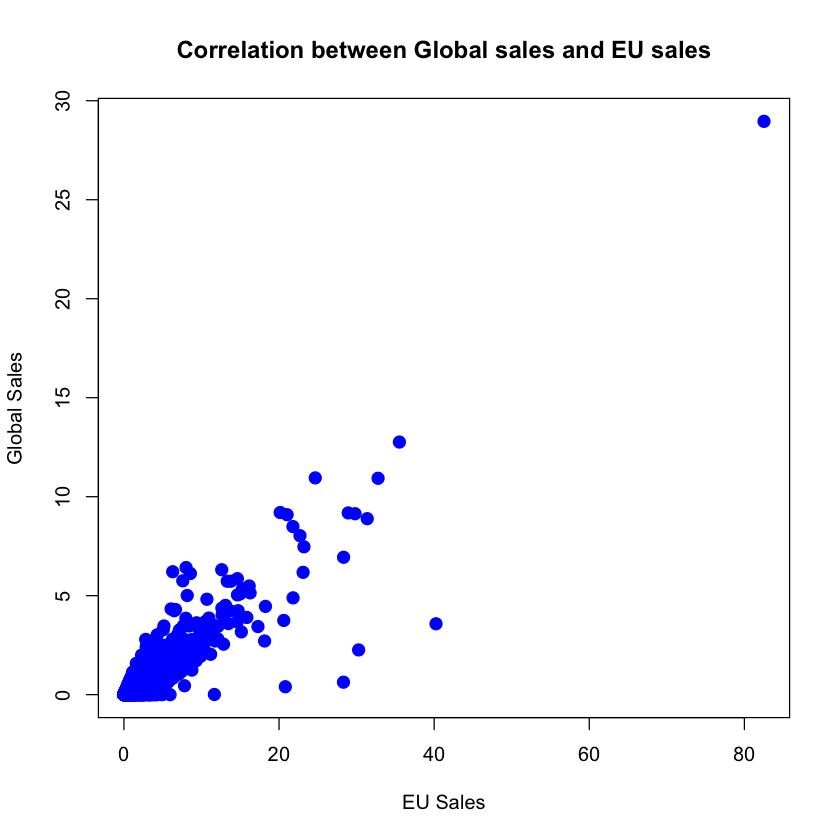

In [96]:
plot(x = vgs$Global_Sales, y = vgs$EU_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between Global sales and EU sales", 
     xlab="EU Sales", ylab="Global Sales")

#### As we can see easily, the last two look like they have more correlations with Global Sales.

### Now, let's move onto correlations between scores and sales

1) Let's see the correlation between Global_Sales and Critic_Score

In [99]:
head(new_vgs)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Year_of_Release,Total_Score,Western_Sales,Eastern_Sales
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,E,2006,7.80,70.32,12.22
3,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,E,2008,8.25,28.44,7.08
4,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,E,2009,8.00,26.54,6.23
7,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,E,2006,8.70,20.42,9.38
8,Wii Play,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,E,2006,6.20,23.14,5.77
9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,E,2009,8.55,21.38,6.94



Call:
lm(formula = Global_Sales ~ Critic_Score, data = new_vgs)

Residuals:
   Min     1Q Median     3Q    Max 
-1.481 -0.661 -0.314  0.153 81.587 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.496566   0.116377  -12.86   <2e-16 ***
Critic_Score  0.032101   0.001629   19.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.877 on 6933 degrees of freedom
Multiple R-squared:  0.05307,	Adjusted R-squared:  0.05293 
F-statistic: 388.5 on 1 and 6933 DF,  p-value: < 2.2e-16


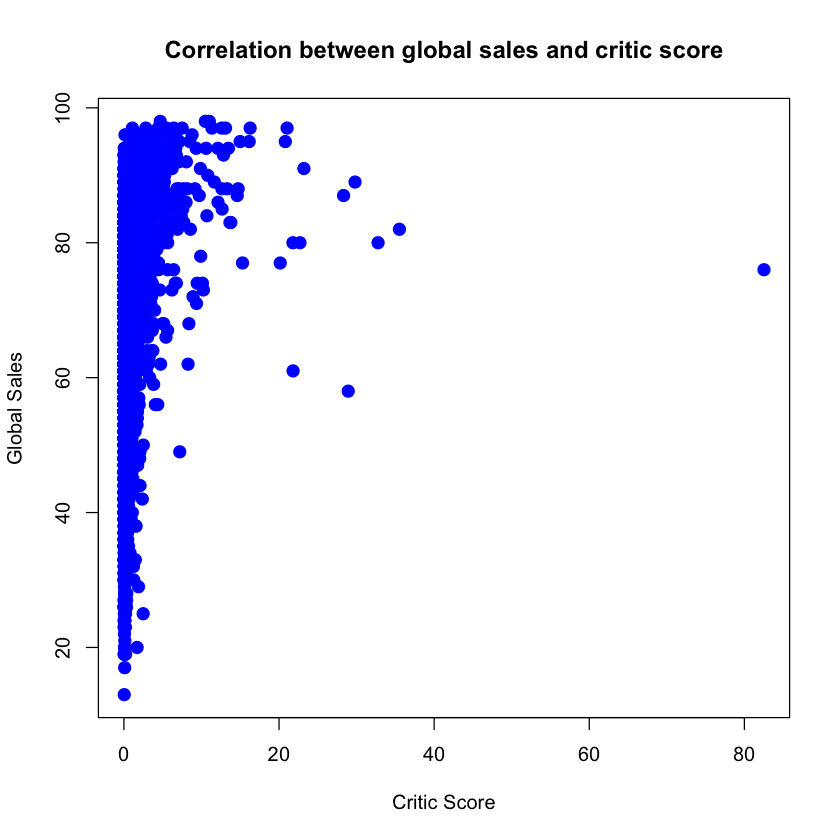

In [100]:
cs_sale <- lm(Global_Sales~Critic_Score, data = new_vgs)
summary(cs_sale)
plot(x = new_vgs$Global_Sales, y =new_vgs$Critic_Score, col='blue', pch=20, cex=2, 
     main="Correlation between global sales and critic score", 
     xlab="Critic Score", ylab="Global Sales")

#### So, there is no good correlation between critic score and global sales

2) Let's see the correlation between Global_Sales and User_Score


Call:
lm(formula = Global_Sales ~ User_Score, data = new_vgs)

Residuals:
   Min     1Q Median     3Q    Max 
-0.998 -0.639 -0.409 -0.003 81.685 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02815    0.11725  -0.240     0.81    
User_Score   0.10909    0.01604   6.803 1.11e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.922 on 6933 degrees of freedom
Multiple R-squared:  0.006631,	Adjusted R-squared:  0.006488 
F-statistic: 46.28 on 1 and 6933 DF,  p-value: 1.11e-11


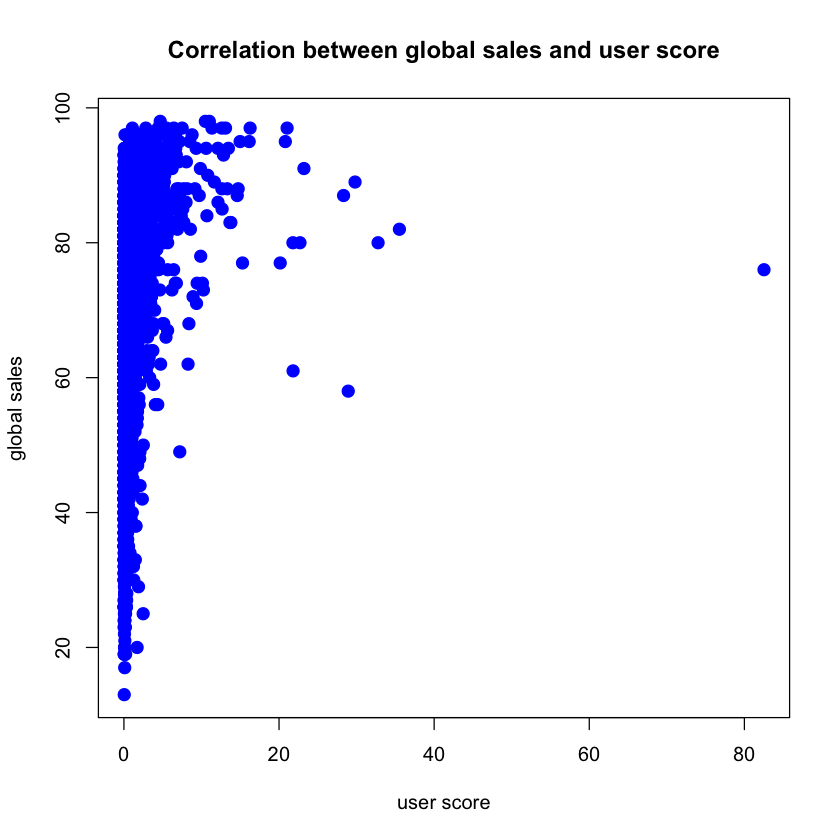

In [101]:
us_sale <- lm(Global_Sales~User_Score, data = new_vgs)
summary(us_sale)
plot(x = new_vgs$Global_Sales, y =new_vgs$Critic_Score, col='blue', pch=20, cex=2, 
     main="Correlation between global sales and user score", 
     xlab="user score", ylab="global sales")

#### So, there is almost no correlation between user score and global sales

## 8. Linear Regression

In [102]:
natoeu_vgs <- lm(NA_Sales~EU_Sales, data = vgs)
natojp_vgs <- lm(NA_Sales~JP_Sales, data = vgs)
jptoother_vgs <- lm(JP_Sales~Other_Sales, data = vgs)
gstona_vgs <- lm(Global_Sales~NA_Sales, data = vgs)
gstoeu_vgs <- lm(Global_Sales~EU_Sales, data = vgs)

In [103]:
summary(natoeu_vgs)
cat("-----------------------------1-------------------------------")
summary(natojp_vgs)
cat("-----------------------------2-------------------------------")
summary(jptoother_vgs)
cat("-----------------------------3-------------------------------")
summary(gstona_vgs)
cat("-----------------------------4-------------------------------")
summary(gstoeu_vgs)
cat("-----------------------------5-------------------------------")


Call:
lm(formula = NA_Sales ~ EU_Sales, data = vgs)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6863 -0.0839 -0.0713  0.0129 26.0667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.083920   0.004214   19.91   <2e-16 ***
EU_Sales    1.237100   0.008047  153.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5236 on 16717 degrees of freedom
Multiple R-squared:  0.5857,	Adjusted R-squared:  0.5857 
F-statistic: 2.364e+04 on 1 and 16717 DF,  p-value: < 2.2e-16


-----------------------------1-------------------------------


Call:
lm(formula = NA_Sales ~ JP_Sales, data = vgs)

Residuals:
   Min     1Q Median     3Q    Max 
-5.939 -0.183 -0.111  0.032 36.724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.171421   0.005795   29.58   <2e-16 ***
JP_Sales    1.184368   0.018199   65.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7267 on 16717 degrees of freedom
Multiple R-squared:  0.2021,	Adjusted R-squared:  0.2021 
F-statistic:  4235 on 1 and 16717 DF,  p-value: < 2.2e-16


-----------------------------2-------------------------------


Call:
lm(formula = JP_Sales ~ Other_Sales, data = vgs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7340 -0.0644 -0.0548 -0.0289  9.6837 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.054813   0.002357   23.25   <2e-16 ***
Other_Sales 0.481472   0.012239   39.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2955 on 16717 degrees of freedom
Multiple R-squared:  0.08474,	Adjusted R-squared:  0.08468 
F-statistic:  1548 on 1 and 16717 DF,  p-value: < 2.2e-16


-----------------------------3-------------------------------


Call:
lm(formula = Global_Sales ~ NA_Sales, data = vgs)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.9711  -0.1074  -0.0520   0.0180  11.6008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.062041   0.004258   14.57   <2e-16 ***
NA_Sales    1.790533   0.004980  359.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5238 on 16717 degrees of freedom
Multiple R-squared:  0.8855,	Adjusted R-squared:  0.8855 
F-statistic: 1.293e+05 on 1 and 16717 DF,  p-value: < 2.2e-16


-----------------------------4-------------------------------


Call:
lm(formula = Global_Sales ~ EU_Sales, data = vgs)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0551  -0.1393  -0.0870   0.0257  30.1850 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.131546   0.005399   24.37   <2e-16 ***
EU_Sales    2.771916   0.010308  268.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6708 on 16717 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8122 
F-statistic: 7.231e+04 on 1 and 16717 DF,  p-value: < 2.2e-16


-----------------------------5-------------------------------

As we can see, NA_Sales has the largest correlation with Global_Sales, which means NA contributes most to global sales, and the games that are suitable to NA, can represent global games

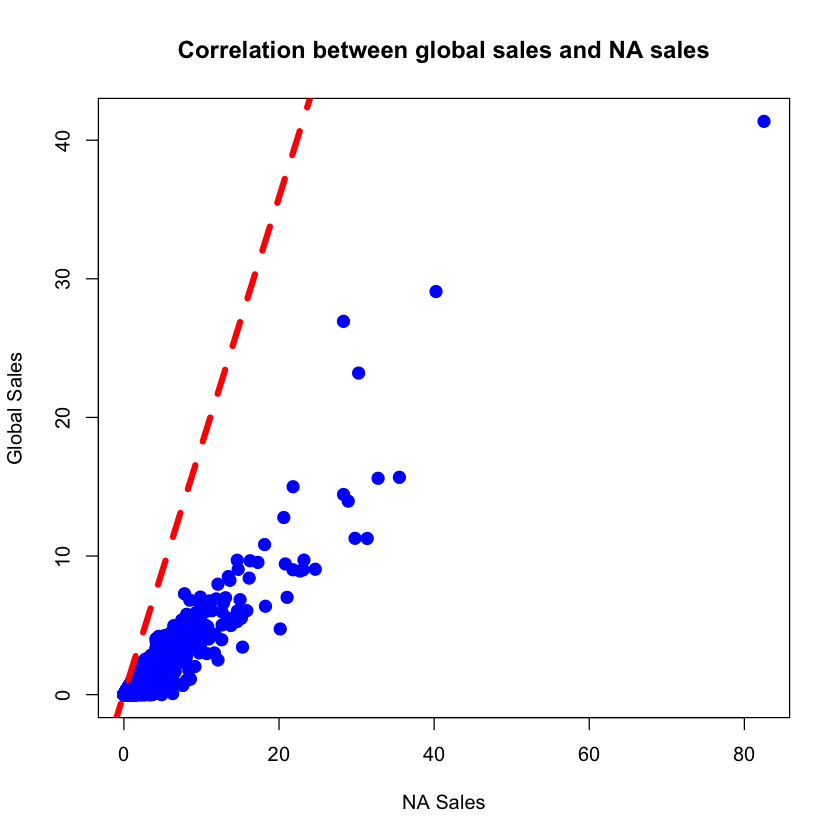

In [104]:
plot(x = vgs$Global_Sales, y =vgs$NA_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between global sales and NA sales", 
     xlab="NA Sales", ylab="Global Sales")
abline(gstona_vgs,col ="red",lwd= 5,lty = "dashed")

## 9. Multiple Linear Regression

Let's see if more variables will be more helpful

In [105]:
mlr_gtowest <- lm(Global_Sales~NA_Sales+EU_Sales, data = vgs)
mlr_gtoeast <- lm(Global_Sales~JP_Sales+Other_Sales, data = vgs)

In [106]:
summary(mlr_gtowest)
cat("--------------------------1-------------------------")
summary(mlr_gtoeast)
cat("--------------------------2-------------------------")


Call:
lm(formula = Global_Sales ~ NA_Sales + EU_Sales, data = vgs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1656 -0.0632 -0.0416 -0.0047  9.3546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.034695   0.002371   14.63   <2e-16 ***
NA_Sales    1.154084   0.004301  268.36   <2e-16 ***
EU_Sales    1.344198   0.006951  193.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2911 on 16716 degrees of freedom
Multiple R-squared:  0.9646,	Adjusted R-squared:  0.9646 
F-statistic: 2.279e+05 on 2 and 16716 DF,  p-value: < 2.2e-16


--------------------------1-------------------------


Call:
lm(formula = Global_Sales ~ JP_Sales + Other_Sales, data = vgs)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.867  -0.144  -0.073   0.045  30.565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.121201   0.006507   18.63   <2e-16 ***
JP_Sales    2.158835   0.021012  102.74   <2e-16 ***
Other_Sales 5.172240   0.034754  148.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8027 on 16716 degrees of freedom
Multiple R-squared:  0.7311,	Adjusted R-squared:  0.7311 
F-statistic: 2.273e+04 on 2 and 16716 DF,  p-value: < 2.2e-16


--------------------------2-------------------------

As we can see, the first one has the largest correlation, so it is western sales

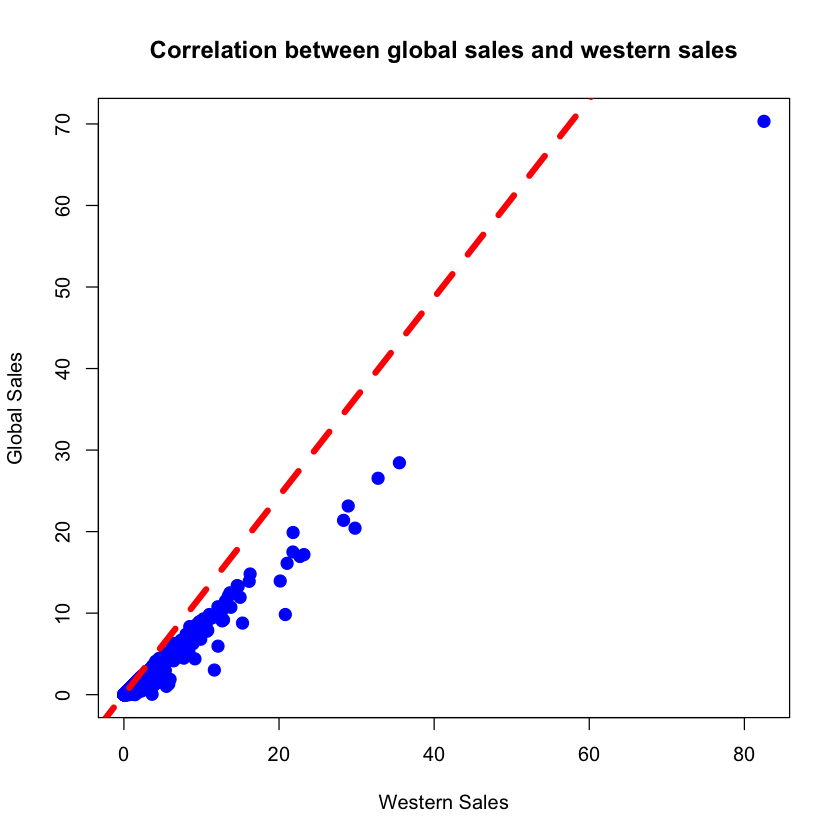

In [107]:
best_lr <- lm(Global_Sales~Western_Sales,data=new_fvgs)
plot(x = new_fvgs$Global_Sales, y =new_fvgs$Western_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between global sales and western sales", 
     xlab="Western Sales", ylab="Global Sales")
abline(best_lr,col ="red",lwd= 5,lty = "dashed")

As we can see, the western sales is more correlated to global sales, and it is better than only NA sales or EU sales, which means we prove again that the in the high western sales, action games with M Rating can be used to global, and it is **The Last of Us on PS4**

## 10.Project Report

### Overview:

Sony Computer Entertainment (SCE) or Sony Interactive Entertainment (SIE) is a multinational video game and digital entertainment company wholly owned by Japanese conglomerate Sony Corporation. 

Since the launch of the original PlayStation console in 1994, the company has been developing PlayStation home video game consoles, accessories and services lineup. The company expanded from Japan into North America and Europe, where it founded the branches Sony Computer Entertainment.

In 2020, Sony is preparing to launch their newest generation of PlayStation, Playstation 5 (PS5). In order to prepare launch titles for PS5, Sony've hired us to do an analysis of the their previous video games to know:

1. If they should work on the sequence of their existing games or create a new game. 

2. And if they have to create a new game, what is the right genre and ESRB rating suitable for 2020 gaming industry. 

### Data and model

#### Summary:
Trend in Gaming Industry:
- Favorite Genre in gaming industry: **Action**, **Shooter** and **Role-Playing**
- Favorite Rating in gaming industry: **M - Mature** and **E - Everyone**

We do not analyze or mention about other platforms because Sony is the owner of Playstation. So the best strategy is to release games Sony makes on its on console. Analyze of other consoles or platforms will be ignore.

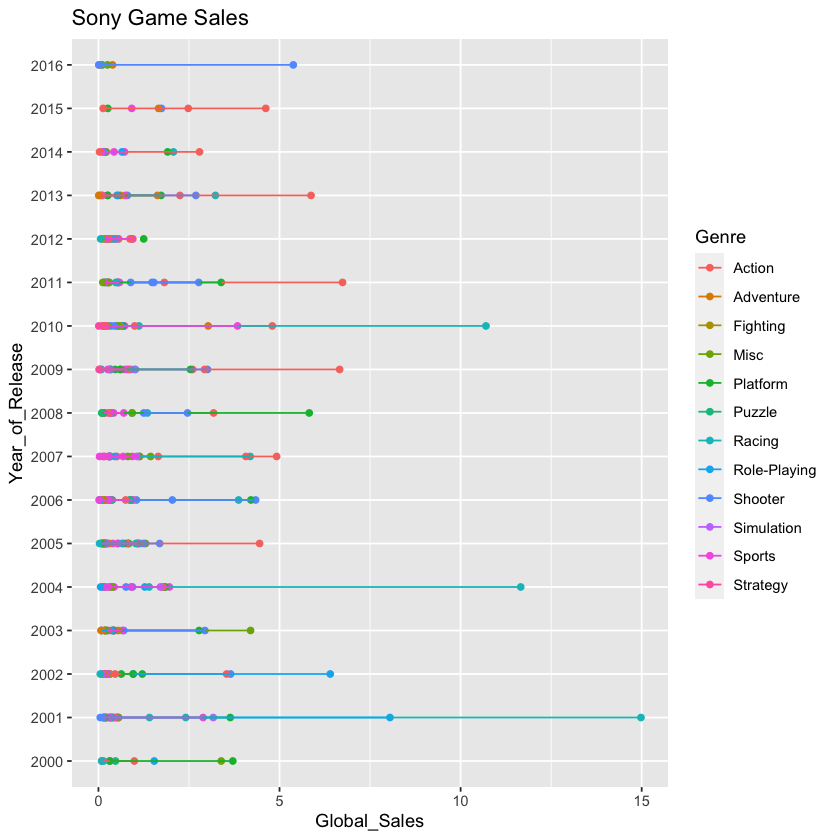

In [108]:
# Sony game genre sales
qplot(Global_Sales, Year_of_Release, data = nsony_nvgs, main = "Sony Game Sales", geom = c("point", "line"), color = Genre)

Based on the plot, we can see that Sony had pretty good sales in Racing and Action games. So customers have known Sony's brand for good Racing and Action games over the years. If customers still want to buy action or racing games, Sony would be the first brand they think of.
=> So Sony should continue to focus on Racing and Action games to keep customer awareness and top of mind.

### Result:

In [109]:
sony3n # Potential games from Sony (with Global Sales >= 5 millions and Total_Scores >= 8)

,Name,Genre,Publisher,Western_Sales,Eastern_Sales,Global_Sales,Total_Score,Rating,Year_of_Release
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
10,Uncharted 4: A Thief's End,Shooter,Sony Computer Entertainment,4.35,1.04,5.38,8.60,T,2016
8,The Last of Us,Action,Sony Computer Entertainment Europe,4.59,1.27,5.87,9.30,M,2013
5,Uncharted 3: Drake's Deception,Action,Sony Computer Entertainment,5.52,1.22,6.74,8.75,T,2011
6,Uncharted 2: Among Thieves,Action,Sony Computer Entertainment,5.47,1.19,6.66,9.20,T,2009
9,LittleBigPlanet,Platform,Sony Computer Entertainment,4.78,1.04,5.82,8.15,E,2008
2,Gran Turismo 4,Racing,Sony Computer Entertainment,3.02,8.63,11.66,8.70,E,2004
7,Kingdom Hearts,Role-Playing,Sony Computer Entertainment,4.84,1.56,6.40,8.65,E,2002
1,Gran Turismo 3: A-Spec,Racing,Sony Computer Entertainment,11.94,3.03,14.98,8.95,E,2001
4,Final Fantasy X,Role-Playing,Sony Computer Entertainment,4.98,3.06,8.05,8.95,T,2001


As you can see, the table above shows the best games of Sony, with over 5 million total copies had been sold for the Playstation and had received more than 8 in total scores (average between critic score and user score). **All the existing games of Sony deserve a sequence because they all match with current trend in gaming industry**.

If it have to be just 1 game that will have a sequence. We recommend Sony to go with the one match the highest in trend. That will be **The Last Of Us** and release it on Sony platform, which is **Playstation - PS**. 


#### In case, Sony have to make a new game, what is the right genre and ESRB rating suitable for 2020 gaming industry.

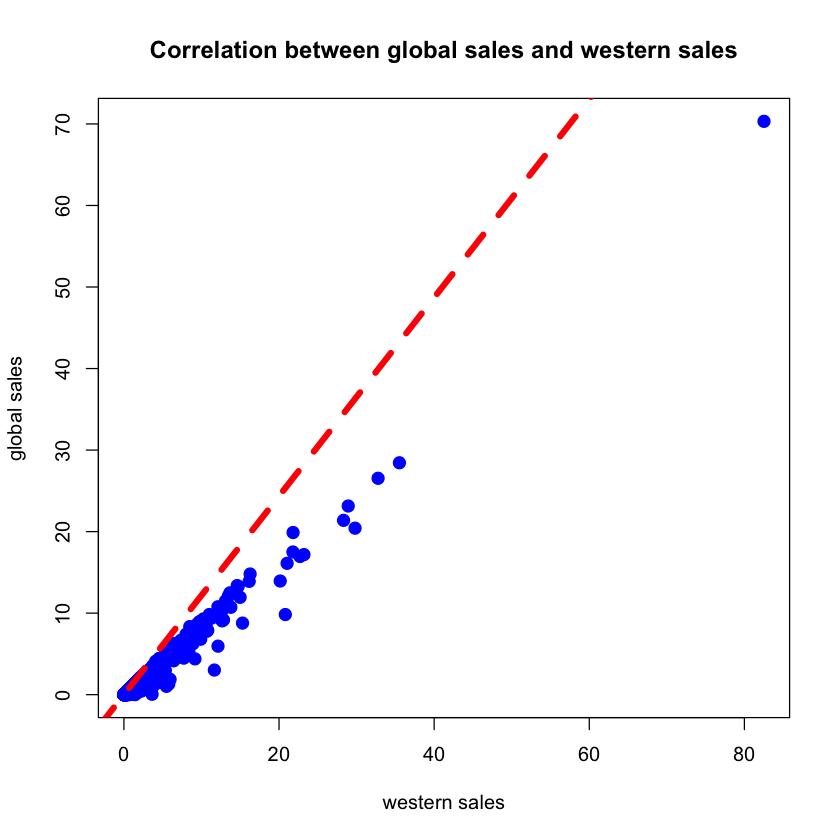

In [110]:
# Draw SLR
best_lr <- lm(Global_Sales~Western_Sales,data=new_fvgs)
plot(x = new_fvgs$Global_Sales, y =new_fvgs$Western_Sales, col='blue', pch=20, cex=2, 
     main="Correlation between global sales and western sales", 
     xlab="western sales", ylab="global sales")
abline(best_lr,col ="red",lwd= 5,lty = "dashed")

We fit a linear regression model to **predict Global_Sales** that **included North America Sales and Europe Sales as predictors**. And found out that **Western Sales (NA + EU Sales) have stronger impact on Global_Sales than Japan and Other regions**. 

So, in order to get more sales and increase profit for the company, Sony should more focus more about genres and rating that favor by Western people, which is:

- Favorite Western Genre: **Action**, **Sport** and **Shooter** 
- Favorite Western Rating: **E - Everyone**, **T - Teen** and **M - Mature**

If Sony wants to make games that have Eastern (JP + Other Sales) culture, styles or focus on Eastern Market. Consider those genres and rating which fit for Eastern people:
- Favorite Eastern Genre: **Action** and **Role-Playing**
- Favorite Eastern Rating: **T - Teen**, **E - Everyone** and **M - Mature**

And also, we tried to fit a linear regression model to predict Global_Sales based on Total Scores, Critic Scores and User Score but it won't fit or have a very small impact on Global_Sales. Therefore, **scores do not have important role in sales**. So we do not recommend Sony to buy scores from critics or seeding for users' review, this strategy is just waste of money and do not have much impact.  